# Finetuning Yolov8 on a custom license plate detection dataset

---



## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Sun Nov 26 14:51:35 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **27.01.2023** with version **YOLOv8.0.20**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.9/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Loading a custom dataset from roboflow






In [6]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="BOc6IDhRJv2ObfV5gtU8")
project1 = rf.workspace("number-plate-object-detection").project("numberplateobjectdetection")
dataset1 = project1.version(10).download("yolov8")
project2 = rf.workspace("roboflow-universe-projects").project("license-plate-recognition-rxg4e")
dataset2 = project2.version(4).download("yolov8")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to numberplateobjectdetection-10 in yolov8:: 100%|██████████| 18214/18214 [00:02<00:00, 7450.37it/s]

loading Roboflow workspace...


loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to License-Plate-Recognition-4 in yolov8:: 100%|██████████| 48488/48488 [00:09<00:00, 5354.41it/s]


## Custom Training

In [7]:
%cd {HOME}
# First pre training of dataset2
!yolo task=detect mode=train model=yolov8s.pt data={dataset2.location}/data.yaml epochs=10 imgsz=640 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 176MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/License-Plate-Recognition-4/data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscr

In [8]:
# Then train on dataset1
!yolo task=detect mode=train model={HOME}/runs/detect/train/weights/best.pt data={dataset1.location}/data.yaml epochs=5 imgsz=640 plots=True

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/numberplateobjectdetection-10/data.yaml, epochs=5, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dyn

In [9]:
!ls {HOME}/runs/detect/train2/

args.yaml					     results.csv	    val_batch1_labels.jpg
confusion_matrix.png				     results.png	    val_batch1_pred.jpg
events.out.tfevents.1701016080.ddf095da22d1.24871.0  train_batch0.jpg	    val_batch2_labels.jpg
F1_curve.png					     train_batch1.jpg	    val_batch2_pred.jpg
P_curve.png					     train_batch2.jpg	    weights
PR_curve.png					     val_batch0_labels.jpg
R_curve.png					     val_batch0_pred.jpg


/content


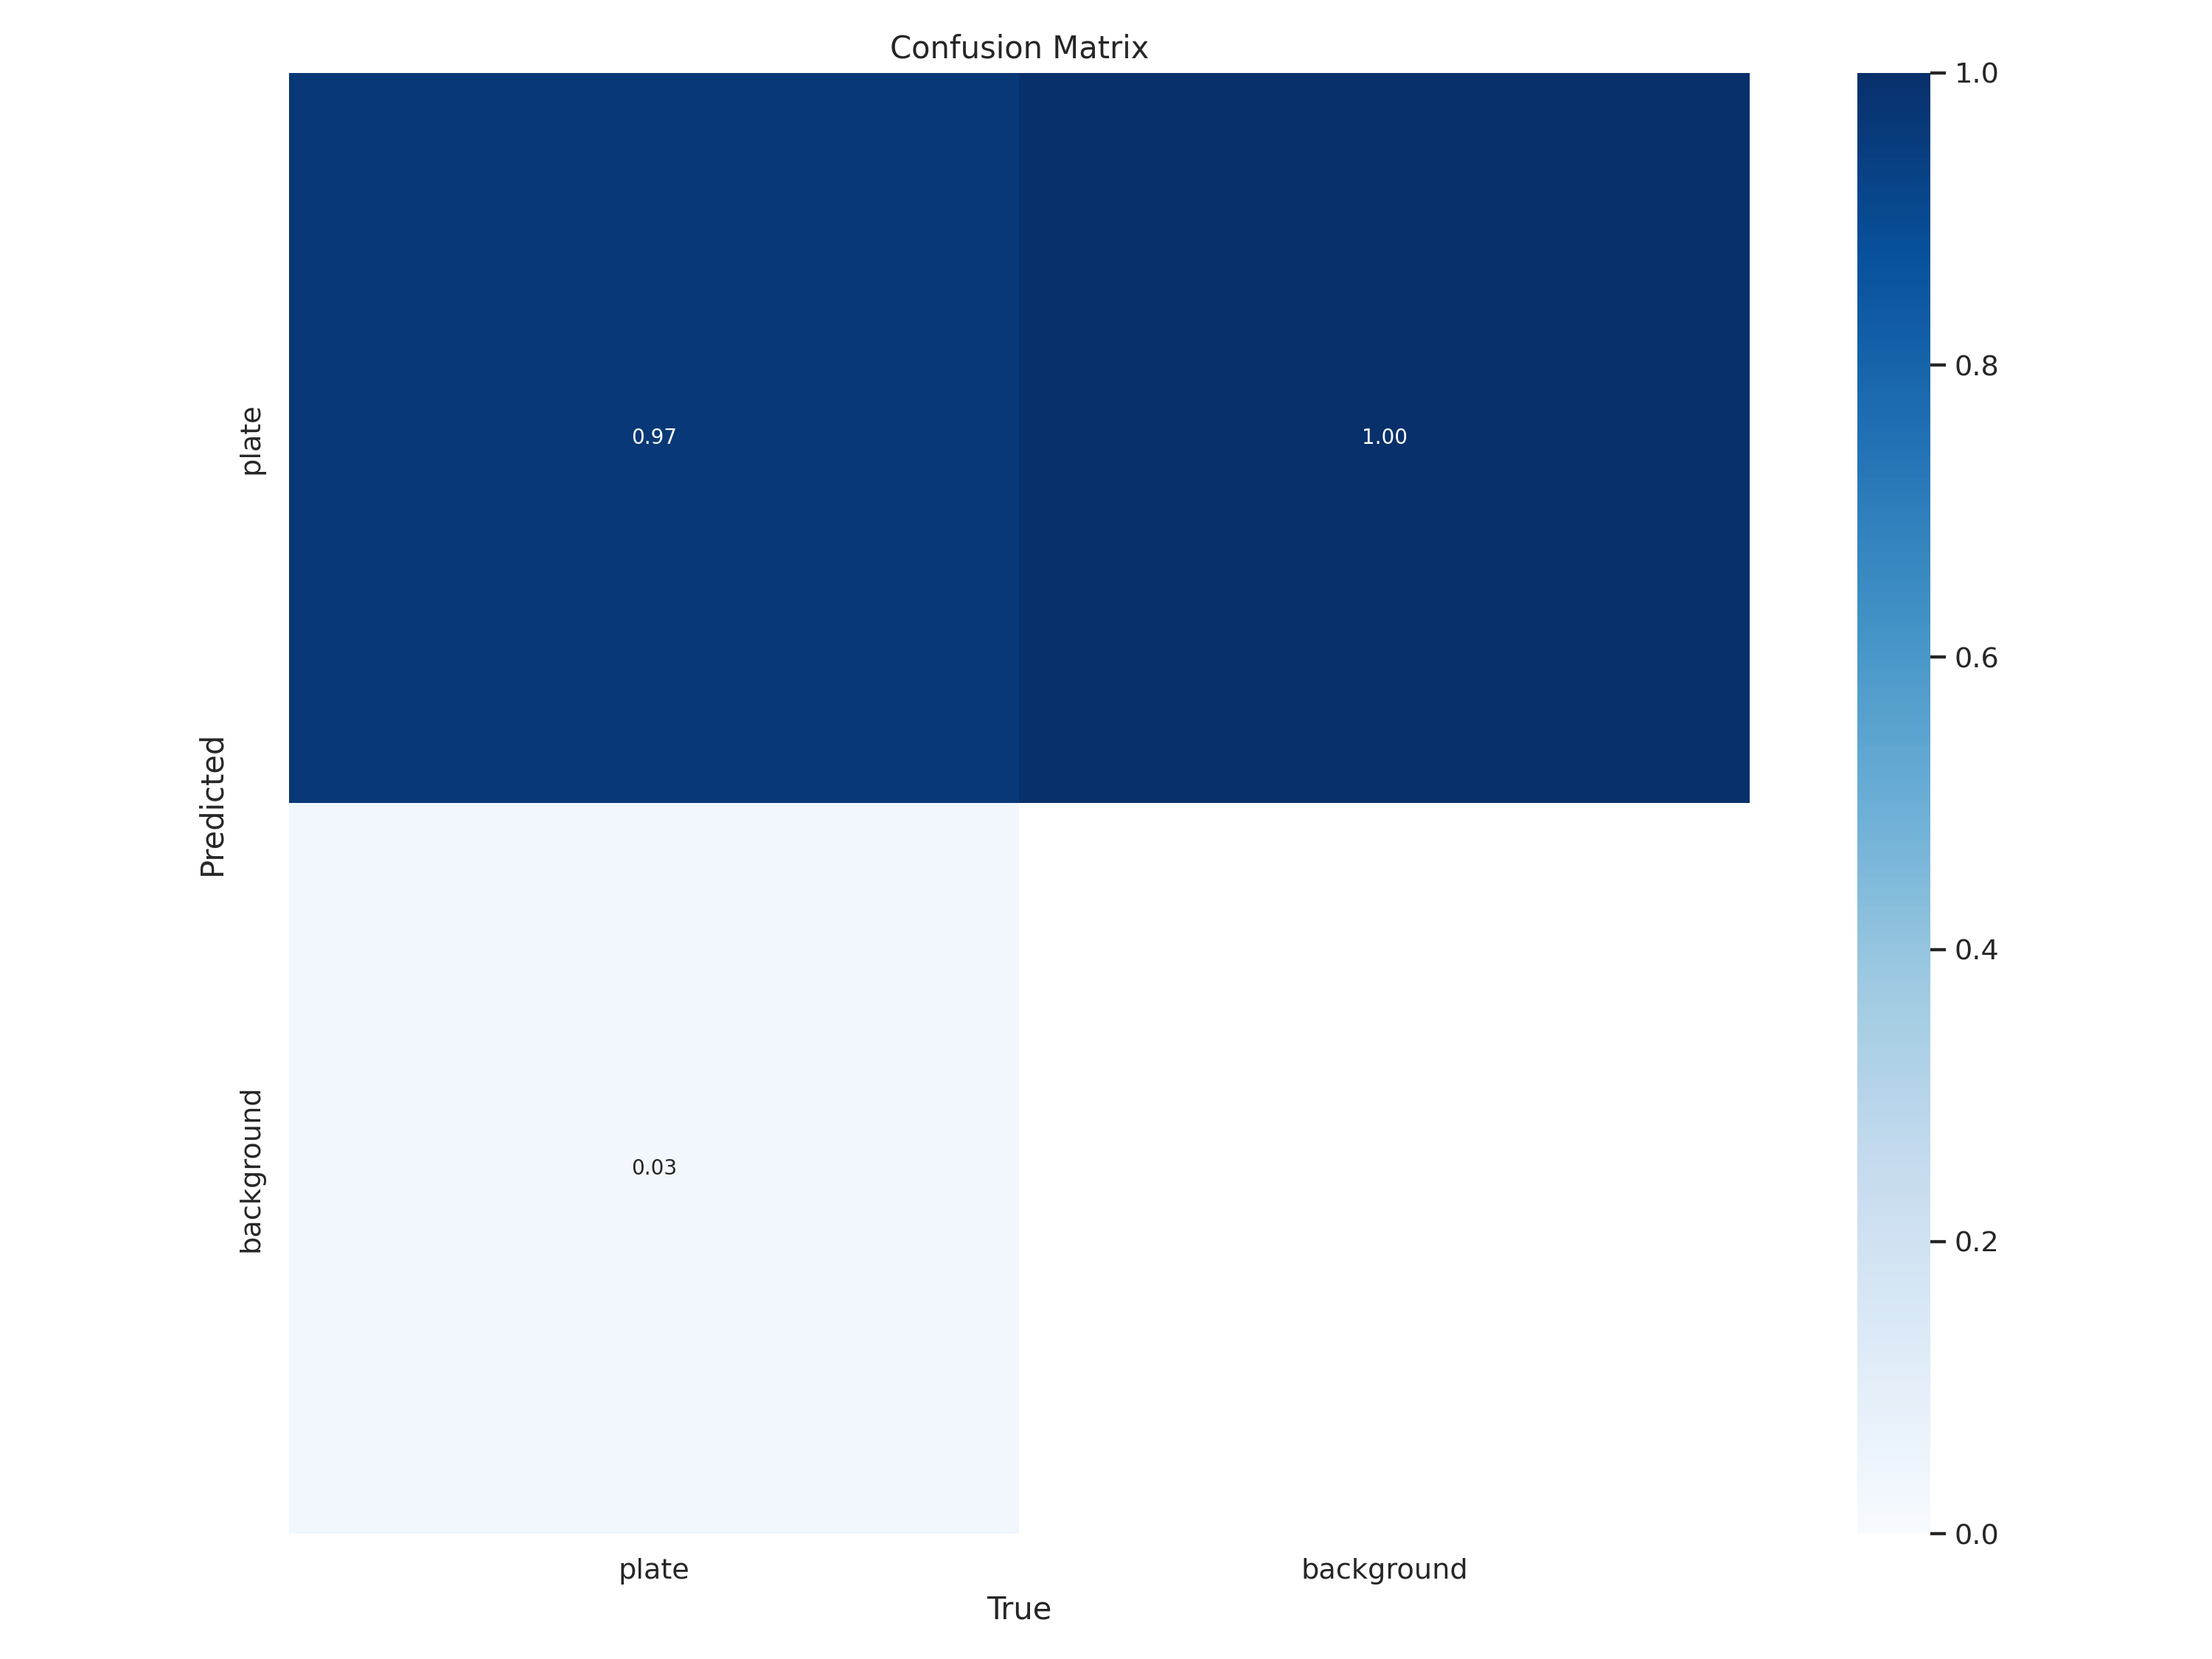

In [10]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

/content


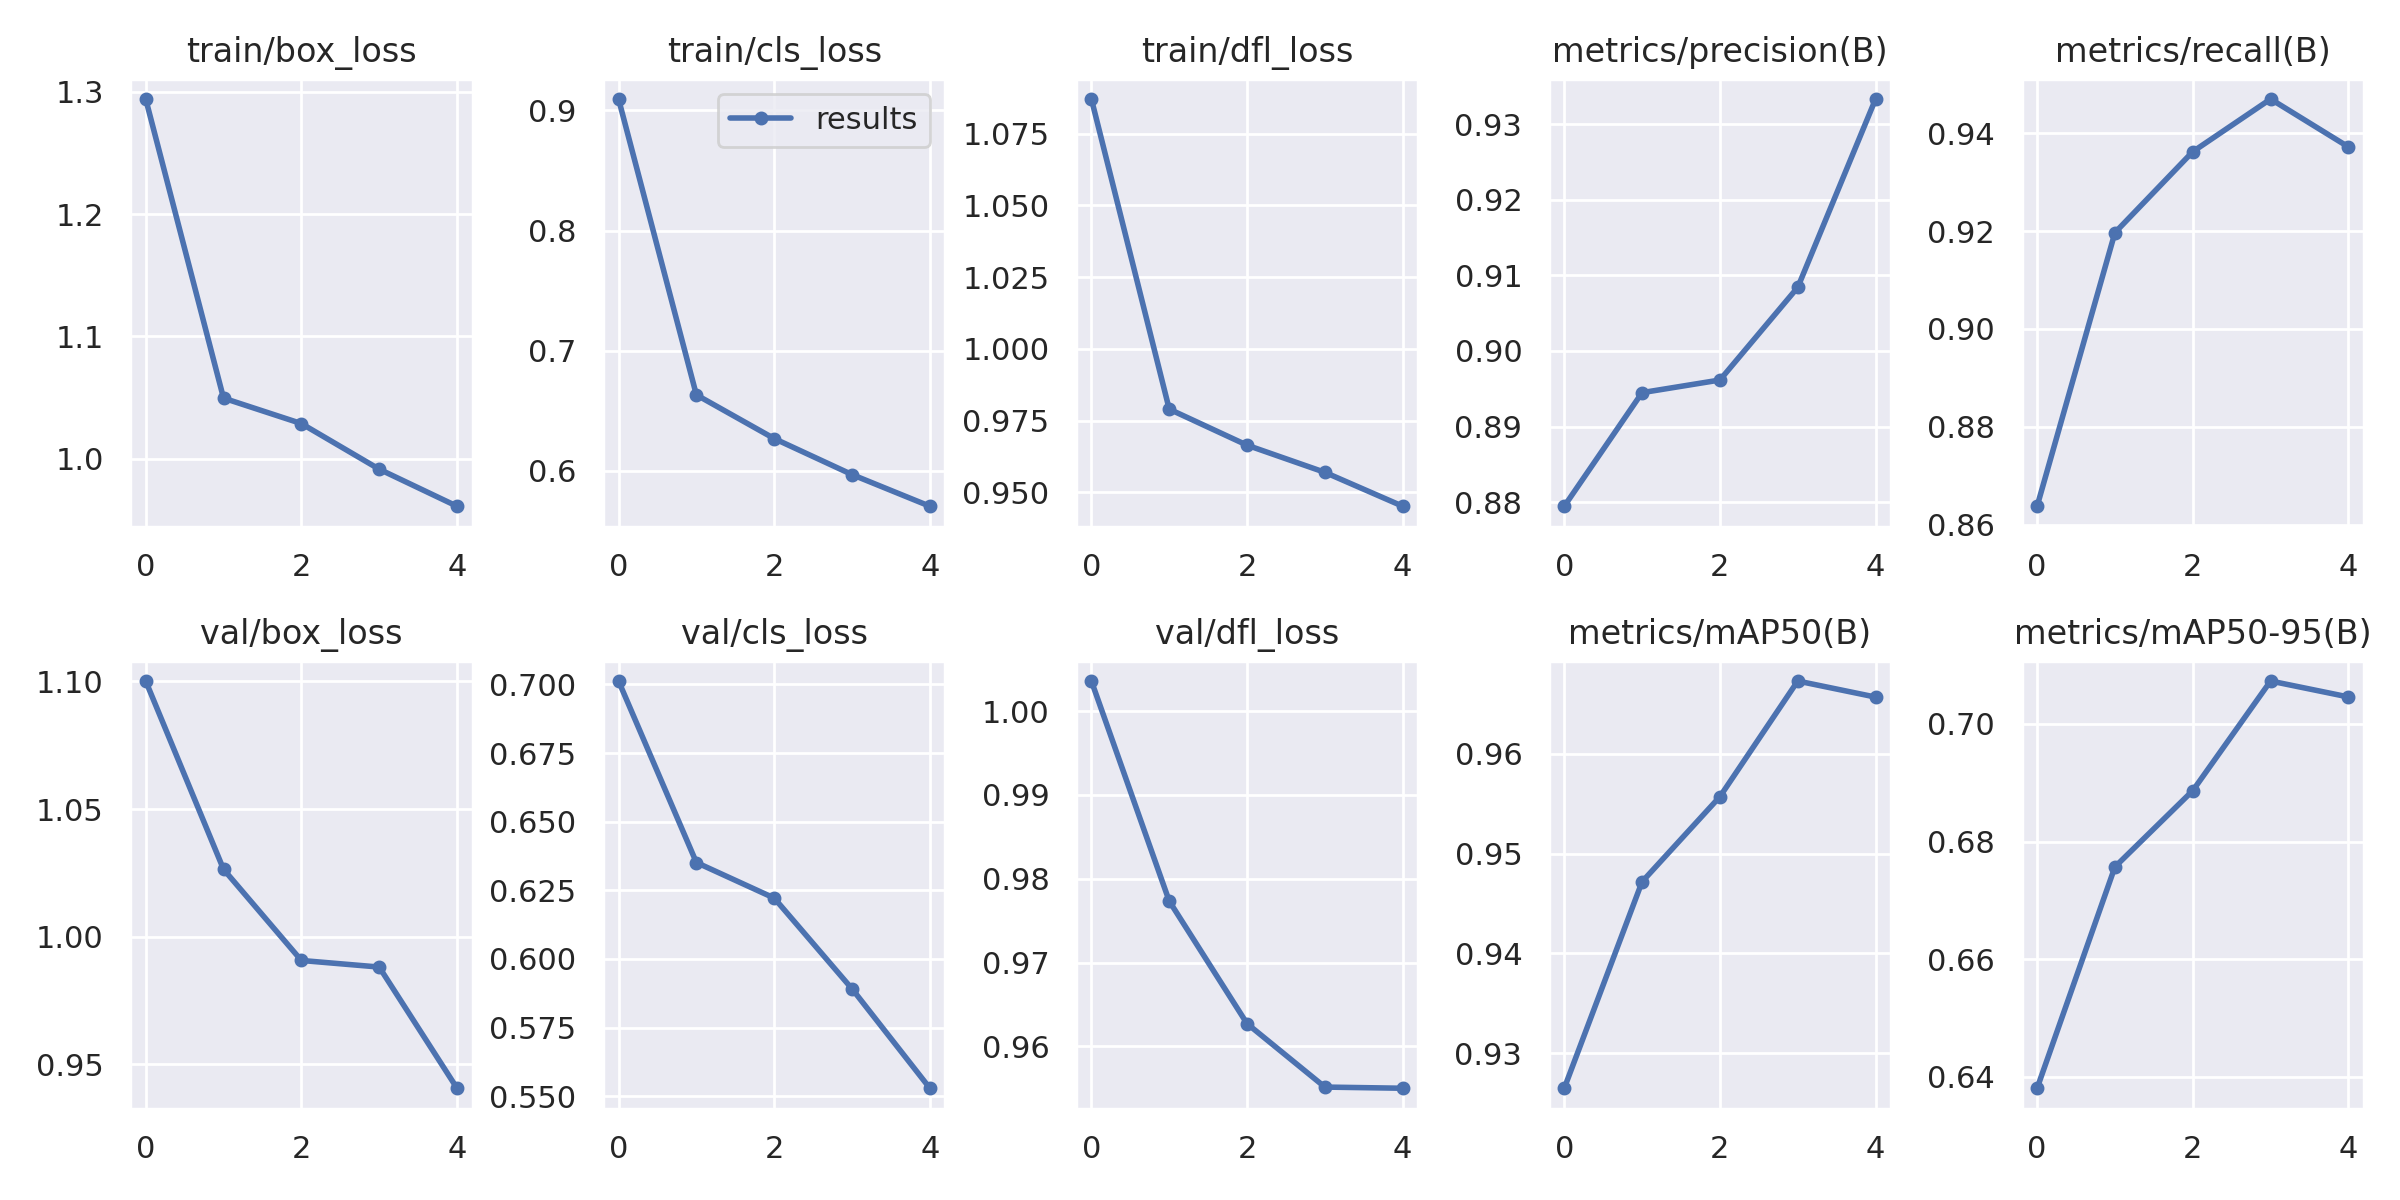

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

/content


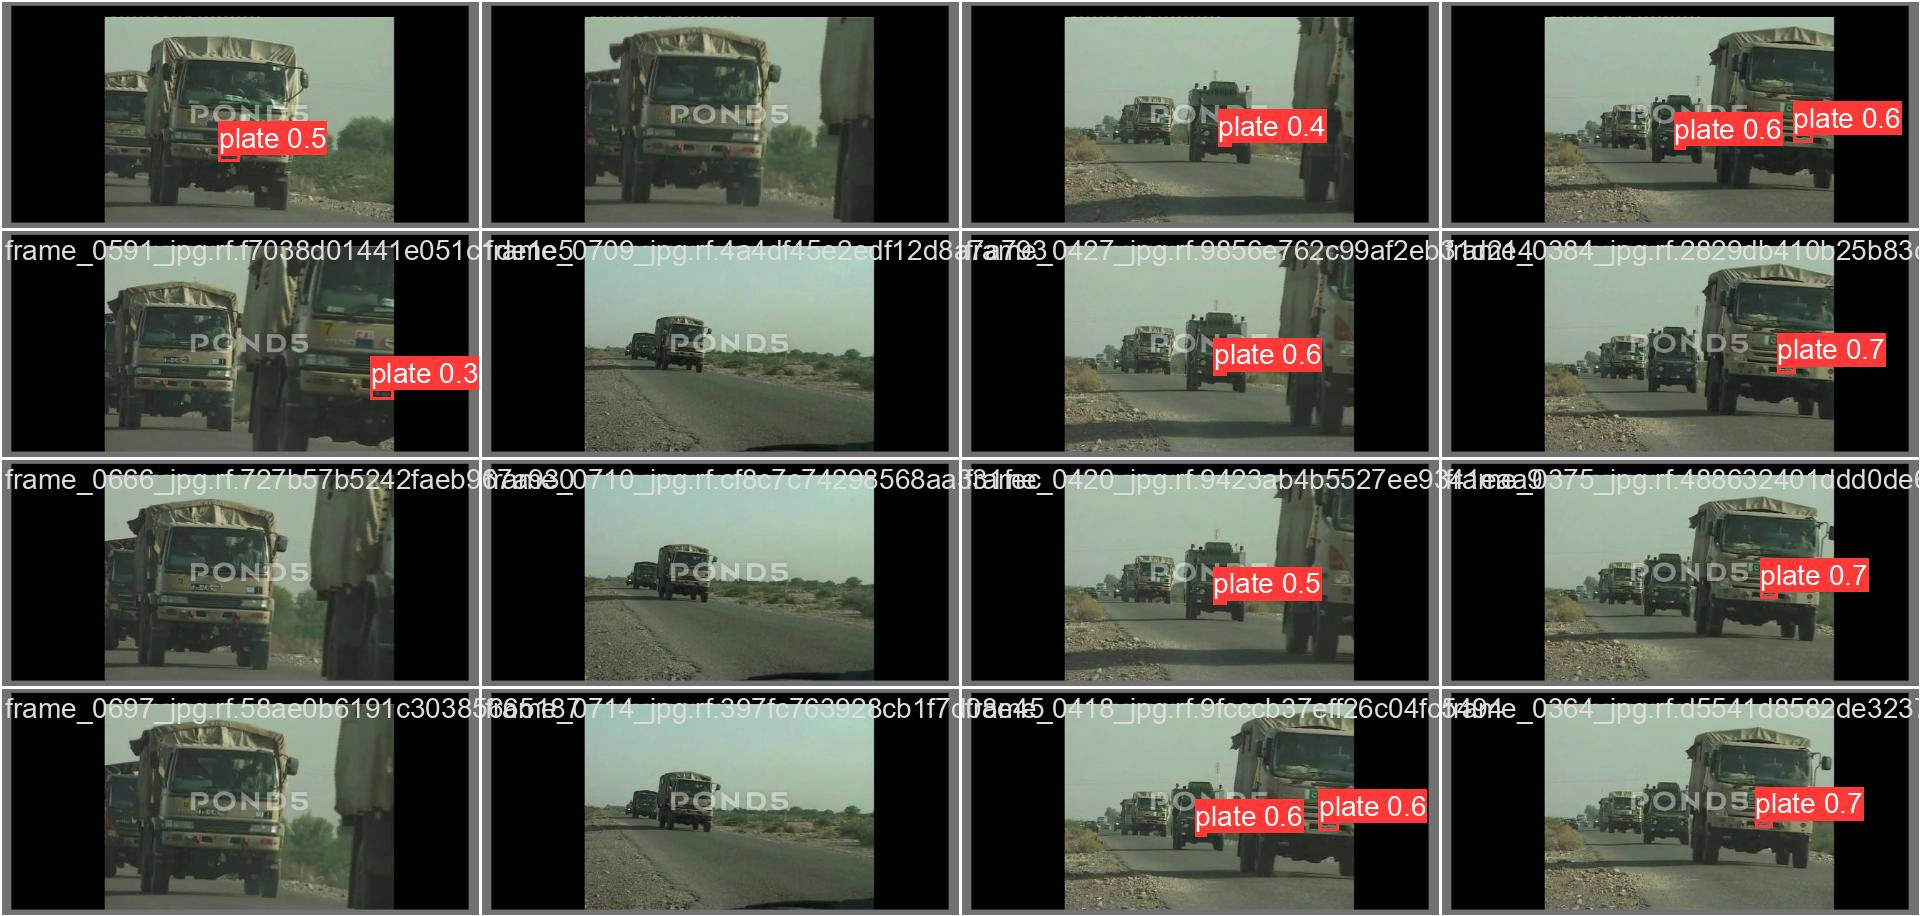

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [13]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

/content
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/cfg/__init__.py", line 230, in entrypoint
    model = YOLO(model)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/engine/model.py", line 60, in __init__
    {'.pt': self._load, '.yaml': self._new}[suffix](model)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/engine/model.py", line 90, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 384, in attempt_load_one_weight
    ckpt = torch_safe_load(weight)  # load ckpt
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 332, in torch_safe_load
    return torch.load(file, map_location='cpu')  # load
  File "/usr/local/lib/python3.10/dist-packages/torch/serialization.py", line 986, in load
    with _open

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content/datasets
2023-11-25 15:46:22.424887: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-25 15:46:22.424955: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-25 15:46:22.424993: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-25 15:46:24.145167: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
image 1/941 /content/datasets/numberplateobjectdetec

In [14]:
!zip -r /content/file.zip /content/runs/detect/train2/

  adding: content/runs/detect/train2/ (stored 0%)
  adding: content/runs/detect/train2/PR_curve.png (deflated 20%)
  adding: content/runs/detect/train2/val_batch2_labels.jpg (deflated 22%)
  adding: content/runs/detect/train2/P_curve.png (deflated 17%)
  adding: content/runs/detect/train2/F1_curve.png (deflated 15%)
  adding: content/runs/detect/train2/val_batch1_labels.jpg (deflated 22%)
  adding: content/runs/detect/train2/train_batch2.jpg (deflated 6%)
  adding: content/runs/detect/train2/train_batch1.jpg (deflated 5%)
  adding: content/runs/detect/train2/confusion_matrix.png (deflated 38%)
  adding: content/runs/detect/train2/results.csv (deflated 80%)
  adding: content/runs/detect/train2/args.yaml (deflated 51%)
  adding: content/runs/detect/train2/R_curve.png (deflated 15%)
  adding: content/runs/detect/train2/val_batch0_labels.jpg (deflated 21%)
  adding: content/runs/detect/train2/val_batch2_pred.jpg (deflated 22%)
  adding: content/runs/detect/train2/weights/ (stored 0%)
  add

In [ ]:
from google.colab import files
files.download("/content/runs/detect/train")

**NOTE:** Let's take a look at few results.